# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last five years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

### 1. INITIALIZATION

In [3]:
#@title Initialization

# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import joblib

In [4]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [6]:
# Prepare data file location and name
location = "..//data//filtered//"
file_name = "google_stock_price_5_years"
ext = "csv"

# Load data file
data = pd.read_csv(location + file_name + "." + ext)

# Check Data Shape
data.shape

(1323, 7)

In [7]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1323 non-null   object 
 1   Open       1323 non-null   float64
 2   High       1323 non-null   float64
 3   Low        1323 non-null   float64
 4   Close      1323 non-null   float64
 5   Adj Close  1323 non-null   float64
 6   Volume     1323 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 72.5+ KB


In [8]:
# check data head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


### 3. DATA PREPROCESSING
#### Validate Data Types

In [9]:
# Covert data column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check columns types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

Therefore, in this analysis, we will incorporate all the available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be utilized to forecast the future opening price.

In [10]:
# Define selected features and target attributes
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
target = "Open"

#### Create Train, Validation, and Test Datasets

To monitor and assess the performance of our model, we will partition the recent stock price dataset into three segments: training, validation, and testing sets.

The division will be structured as follows:
- **Training dataset:** covering the period from the start of 2019 till June, 2023.
- **Validation dataset:** representing the stock prices from July, 2023 till the end of 2023.
- **Testing dataset:** representing the stock prices for the first two months of 2024.

In [11]:
# Define Start and End time for each period 
train_end_date = pd.to_datetime("2023-06-30")
validation_start_date = pd.to_datetime("2023-07-01")
validation_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-02-29")

# Split dataset into Trainign, Validation  & Testing
train_data = data[data["Date"] <= train_end_date][features]
train_dates = data[data["Date"] <= train_end_date]["Date"]

validation_data = data[(data["Date"] >= validation_start_date) & (data["Date"] <= validation_end_date)][features]
validation_dates = data[(data["Date"] >= validation_start_date) & (data["Date"] <= validation_end_date)]["Date"]

test_data = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]


In [14]:
# Display the shape of each dataset
print(f"Training Set : {train_data.shape}")
print(f"Validation Set : {validation_data.shape}")
print(f"Test Set : {test_data.shape}")

Training Set : (1132, 6)
Validation Set : (126, 6)
Test Set : (41, 6)


In [15]:
# Display a Summary of Each dataset
print("Training Data")
display(train_data.head())

print("Validation Data")
display(validation_data.head())

print("Test Data")
display(test_data.head())

Training Data


,Open,High,Low,Close,Adj Close,Volume
0,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


Validation Data


,Open,High,Low,Close,Adj Close,Volume
1132,120.320000,121.019997,119.705002,120.559998,120.559998,13888300
1133,120.059998,123.370003,120.059998,122.629997,122.629997,17830300
1134,120.639999,121.150002,119.250000,120.930000,120.930000,17732500
1135,120.889999,121.750000,120.089996,120.139999,120.139999,20982400
1136,119.070000,119.070000,116.639999,116.870003,116.870003,32960100


Test Data


,Open,High,Low,Close,Adj Close,Volume
1258,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
1259,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
1260,139.850006,140.634995,138.009995,138.039993,138.039993,18253300
1261,138.352005,138.809998,136.850006,137.389999,137.389999,15433200
1262,138.000000,140.639999,137.880005,140.529999,140.529999,17645300


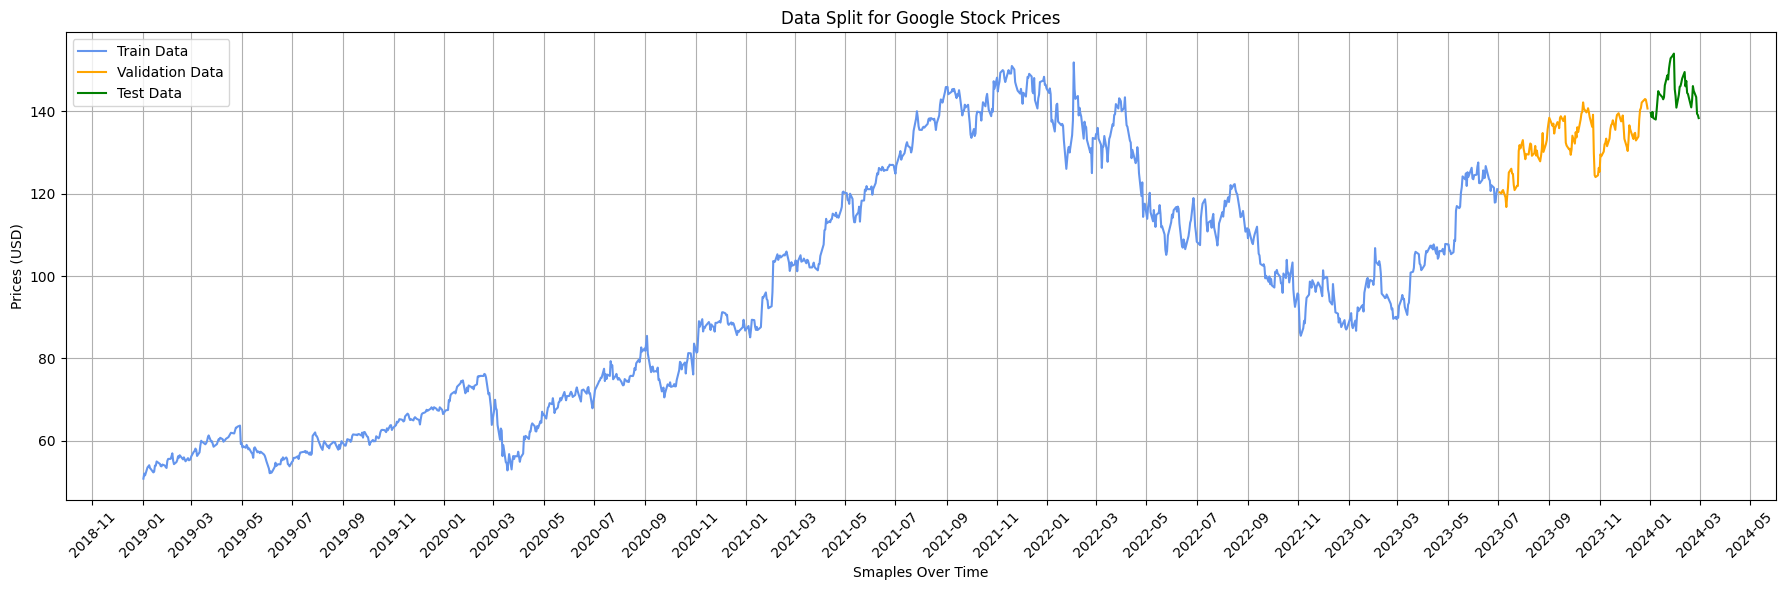

In [17]:
# Plot Stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(train_dates, train_data["Open"], color = "cornflowerblue")
plt.plot(validation_dates, validation_data["Open"], color = "orange")
plt.plot(test_dates, test_data["Open"], color = "green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Prices")
plt.xlabel("Smaples Over Time")
plt.ylabel("Prices (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid()

#### Data Scaling

In [18]:
# Check the Descriptive Statistics of the Features
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,100.882880,102.042442,99.853834,100.974635,100.974635,2.882756e+07
std,31.078299,31.360869,30.780336,31.059813,31.059813,1.268332e+07
min,50.828499,52.374500,50.676800,50.803001,50.803001,6.936000e+06
25%,71.211247,71.905250,70.356251,70.992001,70.992001,2.076335e+07
50%,102.825996,103.927498,101.500000,102.751503,102.751503,2.575600e+07
75%,130.778503,132.021675,129.389999,130.440002,130.440002,3.287305e+07
max,155.080002,157.000000,154.132004,156.500000,156.500000,1.241400e+08


Looking at these details, it's noticeable and anticipated that all price values exhibit similar distributions given they log the price fluctuation on daily basis.

Conversely, the trading volume presents a distinct distribution that differs significantly.

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to normalize all features.

To prevent data leakage, we will fit the scaler solely to the training data. Subsequently, we will use this fitted scaler to transform the training, validation, and testing datasets.

In [22]:
# Initializing Scalr with range [0,1]
scale = MinMaxScaler(feature_range=(0,1))

# Fit & transform Scaler to Train, Validation & Test Datasets
train_data_scaled = scale.fit_transform(train_data)

validation_data_scaled = scale.fit_transform(validation_data)
test_data_scaled = scale.fit_transform(test_data)

The scaler employed here will also be utilized in subsequent phases to revert the scaled data back to its original distribution. Therefore, it is essential to save this scaler to a local folder for future use.

In [23]:
# Prepare Scaler model name and location
scaler_location = "..//models//"
model_name = "google_stock_price_sclaer"
scale_model_ext = "gz"

# Stor Sclaer Model
joblib.dump(scale, scaler_location + model_name + "."  + scale_model_ext)

['..//models//google_stock_price_sclaer.gz']

### 4. STORING PROCESSED DATASETS 
The training, validation, and testing datasets have been processed and are prepared for training the LSTM model in the next phase.

Prior to saving these datasets, it is necessary to reassemble the dates corresponding to each dataset. This will facilitate later evaluation of the model's performance.

In [24]:
# Combine dates with each coressponding dataset
train_final = pd.DataFrame(train_data_scaled, columns=features, index = None)
train_final["Date"] = train_dates.values 

validation_final = pd.DataFrame(validation_data_scaled, columns = features, index = None)
validation_final["Date"] = validation_dates.values


test_final = pd.DataFrame(test_data_scaled, columns = features, index = None)
test_final["Date"] = test_dates.values

In [26]:
# Prepare Datasets Files and Locations
file_location = "..//data//processed//"
train_file_name = "google_stock_price_processed_train"
validation_file_name = "google_stock_price_processed_validation"
test_file_name = "google_stock_price_processed_test"
ext = "csv"

# Store datasets
train_final.to_csv(file_location + train_file_name + "." + ext, index = None)
validation_final.to_csv(file_location + validation_file_name + "." + ext, index = None)
test_final.to_csv(file_location + test_file_name + "." + ext, index = None)